# ScatCluster Processing Workflow
## Load Configuration

In [15]:
from scatcluster.scatcluster import config_load

SC_json_file = "./scatcluster_exp/config/MN_AQU_*_3600_3600_100_4_4_2_7_1_1_avg.json"
SC = config_load(SC_json_file)

ScatCluster config loaded:
{
  "data_savepath": "/Users/christopher.zerafa/Downloads/scatcluster_run/",
  "data_client_path": "/Users/christopher.zerafa/Downloads/sds/",
  "data_network": "MN",
  "data_station": "AQU",
  "data_location": "*",
  "data_channel": "*",
  "data_sample_starttime": "2022-01-01T00:00",
  "data_sample_endtime": "2022-01-01T02:00",
  "data_starttime": "2022-01-01T00:00",
  "data_endtime": "2022-01-03T00:00",
  "data_exclude_days": [],
  "network_segment": 3600,
  "network_step": 3600,
  "network_sampling_rate": 100,
  "network_banks": [
    {
      "octaves": 4,
      "resolution": 4,
      "quality": 2
    },
    {
      "octaves": 7,
      "resolution": 1,
      "quality": 1
    }
  ],
  "network_pooling": "avg",
  "ica_ev_limit": 0.99,
  "ica_min_ICAs": 9,
  "ica_max_ICAs": 10,
  "ica_overwrite_previous_models": false,
  "dendrogram_method": "ward",
  "waveforms_n_samples": 5
}


In [16]:
SC.network_build_scatcluster()

### Overwrite Trace processing with Custom parameters
Current implementation is
```
def trace_process(self, trace: Trace ) -> Trace:
        """Processing happening to all traces
        Args:
            trace (Trace): Obspy trace original
        Returns:
            Trace: Processed Obspy trace
        """
        # trace.decimate(2)
        trace.detrend("linear")
        # trace.filter(type="highpass", freq=1)
        trace.detrend("demean")
        trace.taper(0.05)
        
        return trace
```

In [21]:
# import types
# from obspy.core.stream import Stream
# def custom_stream_process(self, stream: Stream ) -> Stream:
        # Remove trend
        # stream.detrend(type="demean")
        # # High-pass filter
        # stream.filter(type="highpass", freq=0.5)
        # # Remove residual trend
        # stream.detrend(type="constant")
        # # Remove edge effects
        # stream.taper(0.05)
        # return stream
# SC.stream_process = types.MethodType(custom_stream_process, SC)

## Full Data Processing

In [22]:
SC.delete_scatterings()
SC.process_scatcluster_for_range()

The following days will be excluded from the analysis : []
Processing 2022-01-01 - 2022-01-02
> Scatterings already exist
Processing 2022-01-02 - 2022-01-03


In [23]:
SC.process_vectorized_scattering_coefficients()

Number of time windows of size 3600s : 48
Number of days investigated : 2
Number of Scat Coefficients : 384
Vectorized Scat Coefficients : (48, 384)


In [24]:
SC.process_ICA_single(num_ICA=10, tol=1e-6)

Performing ICA for 10 ICAs
  Using pre-calculated model
      ICAs #10 : Explained Variance 99.85214% : MSE 0.00051


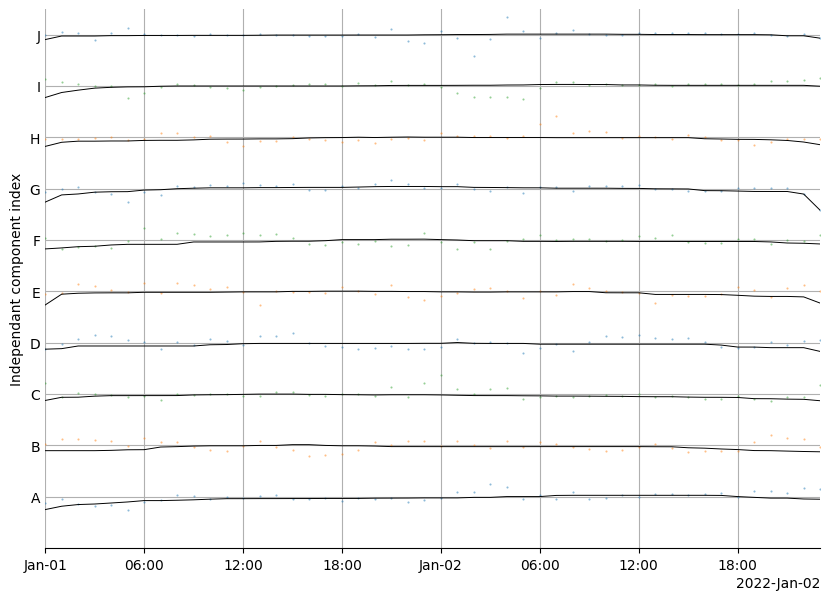

In [25]:
SC.plot_ICA()

### ICA Zoom Plot

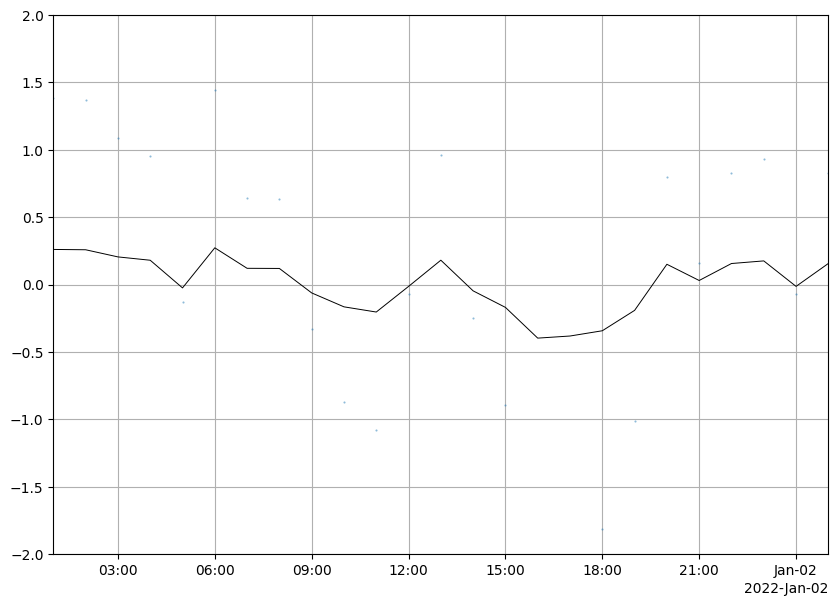

In [28]:
SC.plot_ICA_zoom(ICA_letter = "B",
                  zoom_time_start = "2022-01-01 12:00:00",
                  zoom_time_end = '2022-01-02 03:00:00'
                  )

## Linkage

In [27]:
SC.process_dendrogram_linkage()